In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("titanic.csv")

# Display the first few rows of the dataset
print(df.head())

# Show summary information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())


   PassengerId Survived  Pclass  \
0            1       No       3   
1            2      Yes       1   
2            3      Yes       3   
3            4      Yes       1   
4            5       No       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<class '

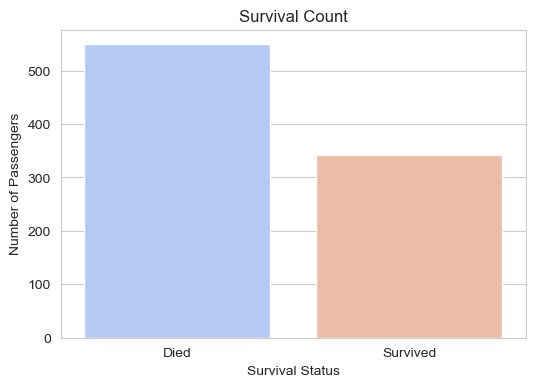

In [320]:

sns.set_style("whitegrid")

# 1. Compare the total number of passengers who survived vs. those who died
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Survived", hue="Survived", palette="coolwarm", legend=False)
plt.xticks(ticks=[0, 1], labels=["Died", "Survived"])
plt.title("Survival Count")
plt.xlabel("Survival Status")
plt.ylabel("Number of Passengers")
plt.show()


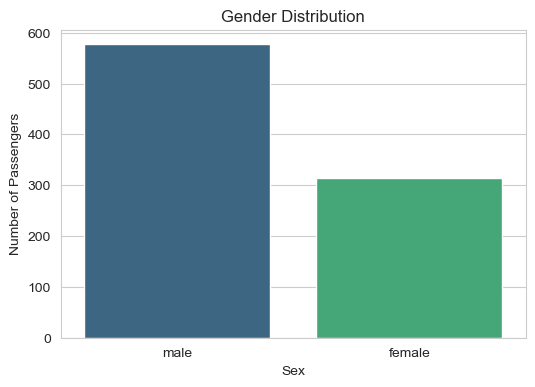

In [321]:
# 2. Compare the total number of males vs. females
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sex", hue="Sex", palette="viridis", legend=False)
plt.title("Gender Distribution")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.show()

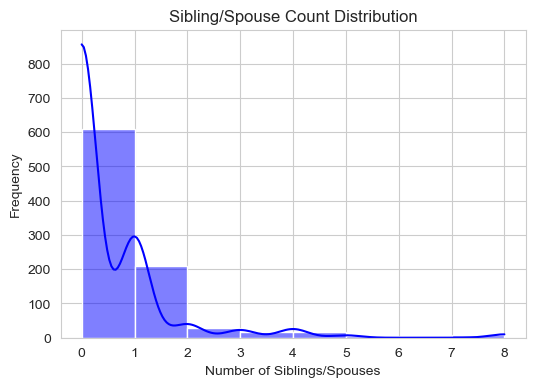

In [322]:

# 3. Histogram showing the distribution of sibling/spouse counts
plt.figure(figsize=(6, 4))
sns.histplot(df["SibSp"], bins=8, kde=True, color="blue")
plt.title("Sibling/Spouse Count Distribution")
plt.xlabel("Number of Siblings/Spouses")
plt.ylabel("Frequency")
plt.show()




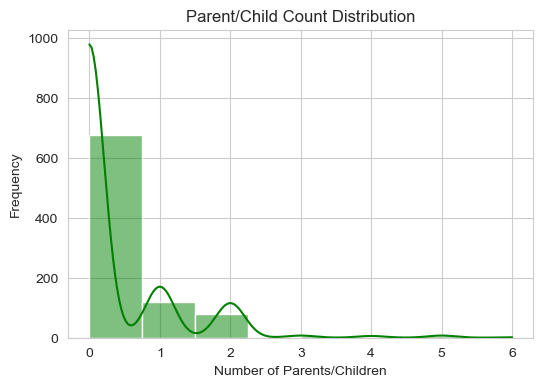

In [323]:
# 4. Histogram showing the distribution of parent/child counts
plt.figure(figsize=(6, 4))
sns.histplot(df["Parch"], bins=8, kde=True, color="green")
plt.title("Parent/Child Count Distribution")
plt.xlabel("Number of Parents/Children")
plt.ylabel("Frequency")
plt.show()



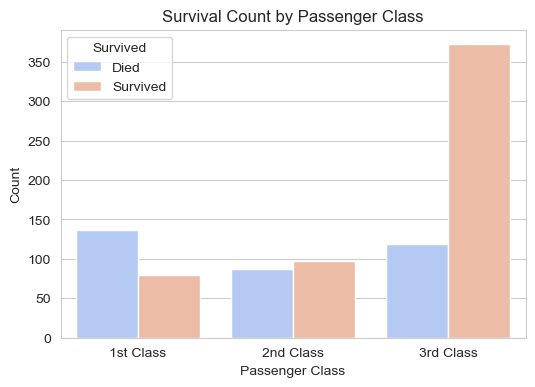

In [324]:

# 1️⃣ Survival by Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Pclass", hue="Survived", palette="coolwarm")
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=["1st Class", "2nd Class", "3rd Class"])
plt.legend(title="Survived", labels=["Died", "Survived"])
plt.show()


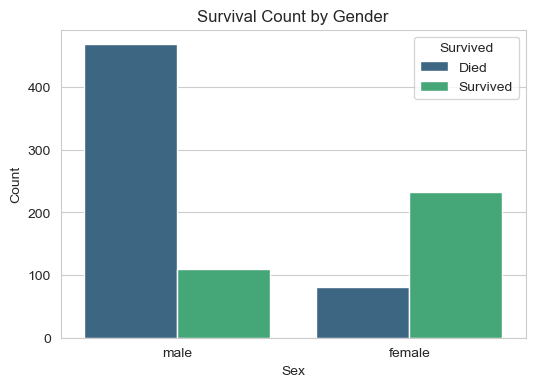

In [325]:

# 2️⃣ Survival by Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sex", hue="Survived", palette="viridis")
plt.title("Survival Count by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Died", "Survived"])
plt.show()


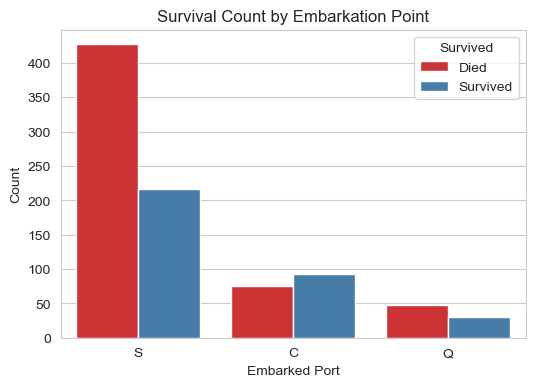

In [326]:

# 3️⃣ Survival by Embarkation Point
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Embarked", hue="Survived", palette="Set1")
plt.title("Survival Count by Embarkation Point")
plt.xlabel("Embarked Port")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["Died", "Survived"])
plt.show()


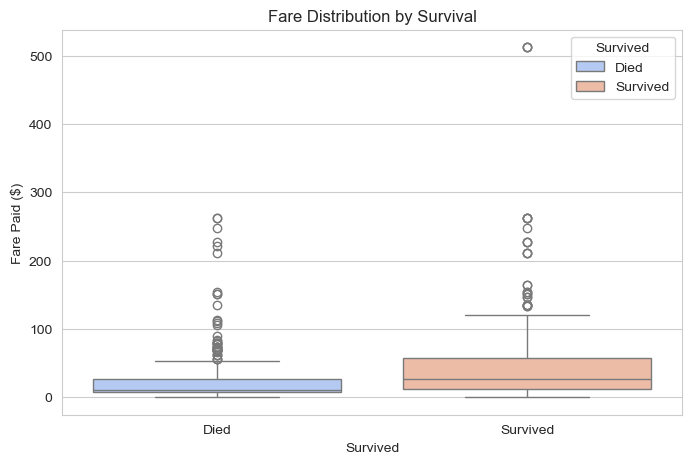

In [327]:

# Survival by Fare (Fixed)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Survived", y="Fare", hue="Survived", palette="coolwarm", dodge=False)
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Fare Paid ($)")
plt.xticks(ticks=[0, 1], labels=["Died", "Survived"])
plt.legend(title="Survived", labels=["Died", "Survived"])
plt.show()



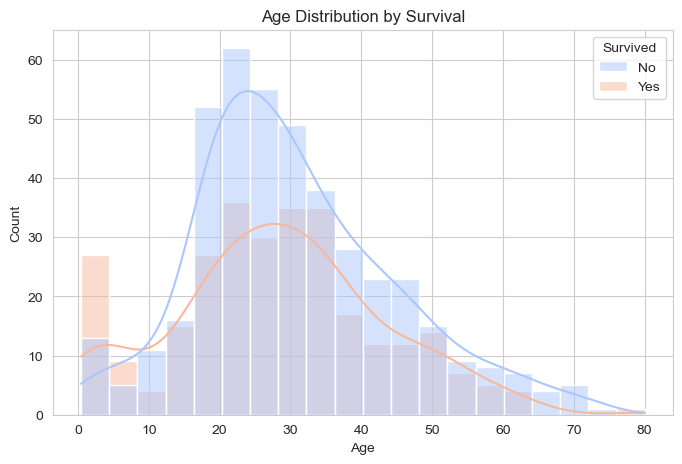

In [328]:

# 5️⃣ Survival by Age
plt.figure(figsize=(8, 5))
sns.histplot(df, x="Age", hue="Survived", bins=20, kde=True, palette="coolwarm")
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [329]:

# Extract the title from the Name column
df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.")  

# Display unique titles
print("Unique Titles:", df["Title"].unique())

# Define high-ranking titles
high_rank_titles = ["Capt", "Col", "Major", "Dr", "Rev", "Sir", "Lady", "Don", "Dona", "Jonkheer", "the Countess"]

# Create a new column indicating whether a passenger had a rank (True/False)
df["Rank"] = df["Title"].isin(high_rank_titles)

# Display the first few rows with new columns
df[["Name", "Title", "Rank"]].head()


Unique Titles: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


,Name,Title,Rank
0,"Braund, Mr. Owen Harris",Mr,False
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,False
2,"Heikkinen, Miss. Laina",Miss,False
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,False
4,"Allen, Mr. William Henry",Mr,False


In [330]:
df["Sex_Encoded"] = pd.factorize(df["Sex"])[0]
df["Sex"] = df["Sex"].astype("category")
df["Sex_Encoded"] = df["Sex"].cat.codes
print(df[["Sex", "Sex_Encoded"]].head(10))


      Sex  Sex_Encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1
5    male            1
6    male            1
7    male            1
8  female            0
9  female            0


In [331]:
# Extract titles from the Name column
df["Title"] = df["Name"].str.extract(r'([A-Za-z]+)\.', expand=False)

# Display unique titles
print(df["Title"].unique())


['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [332]:
title_mapping = {
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs",
    "Dr": "Professional", "Rev": "Professional", "Col": "Professional",
    "Major": "Professional", "Capt": "Professional",
    "Sir": "Nobility", "Don": "Nobility", "Lady": "Nobility", "Countess": "Nobility", "Jonkheer": "Nobility"
}

# Apply title mapping
df["Title"] = df["Title"].replace(title_mapping)


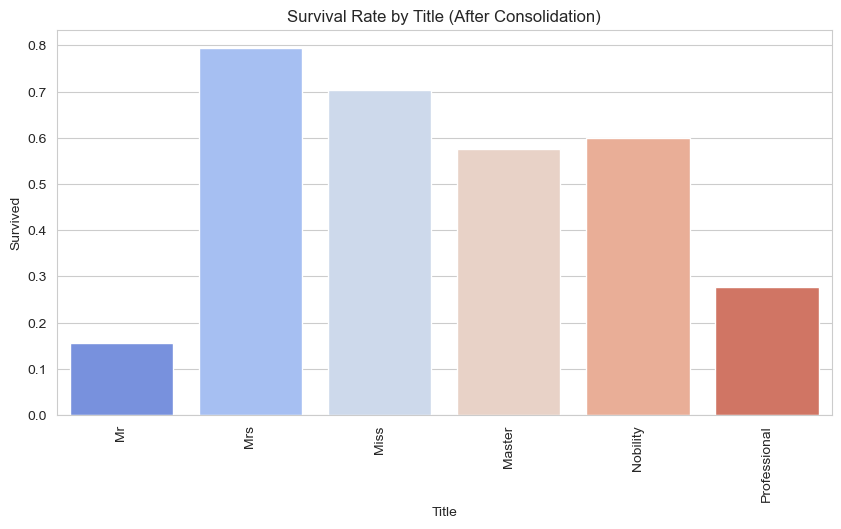

In [360]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Title", y="Survived", hue="Title", errorbar=None, palette="coolwarm", legend=False)
plt.title("Survival Rate by Title (After Consolidation)")
plt.xticks(rotation=90)
plt.show()

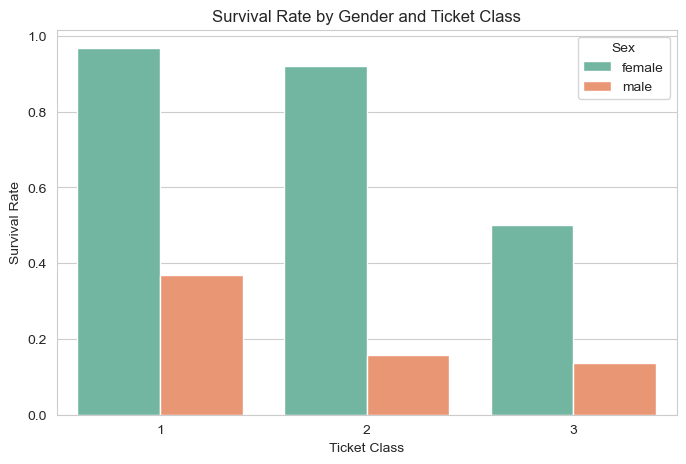

In [358]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Pclass", y="Survived", hue="Sex", errorbar=None, palette="Set2")
plt.title("Survival Rate by Gender and Ticket Class")
plt.xlabel("Ticket Class")
plt.ylabel("Survival Rate")
plt.show()

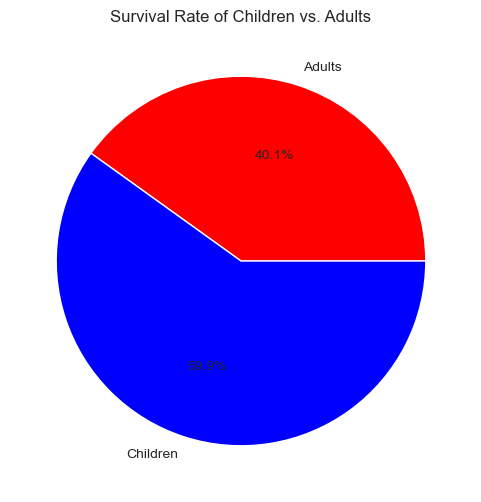

In [364]:

# Convert categorical 'Survived' column to numeric, avoiding the warning
df["Survived"] = df["Survived"].replace({"Yes": 1, "No": 0}).astype(int)
# Ensure 'Survived' is an integer
df["Survived"] = df["Survived"].astype(int)

# Create 'Is_Child' column
df["Is_Child"] = df["Age"] < 18

# Calculate survival rates
survival_rates = df.groupby("Is_Child")["Survived"].mean()

# Create a pie chart
plt.figure(figsize=(6,6))
plt.pie(survival_rates, labels=["Adults", "Children"], autopct="%1.1f%%", colors=["red", "blue"])
plt.title("Survival Rate of Children vs. Adults")
plt.show()


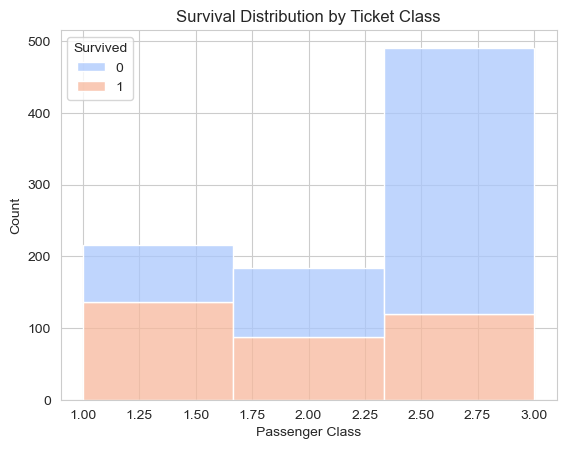

In [336]:
sns.histplot(data=df, x="Pclass", hue="Survived", multiple="stack", palette="coolwarm", bins=3)
plt.title("Survival Distribution by Ticket Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()
